# Order Analysis

#### Importing packages

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

#### Reading data into dataframe from the csv

In [100]:
data = pd.read_csv('Data2.csv')

# Display the first few rows of the dataset

data.head()

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time
0,28.02.2020,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13,€89.30,0.0,17.7
1,28.02.2020,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,€10.00,0.0,16.3
2,28.02.2020,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,€16.96,0.0,13.6
3,28.02.2020,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3,€25.15,4.2,26.1
4,28.02.2020,Portugal,Lisbon,9695,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,€16.00,0.0,11.6


#### Checking for datatypes

In [101]:
data.dtypes

Created Date              object
Country                   object
City                      object
Restaurant ID              int64
Restaurant Name           object
Order State               object
Cancel Reason             object
Cuisine                   object
Platform                  object
Payment Method            object
Card Issuer               object
Products in Order          int64
Order Value € (Gross)     object
Delivery Fee             float64
Delivery Time            float64
dtype: object

Need to fix Column "Created Date" datatype to datetime

Need to extract order value from "Order Value € (Gross)" column and convert the type to float.

In [102]:
data["Created Date"] = pd.to_datetime(data["Created Date"], format='%d.%m.%Y')  # Incase the time column was not in datatime format

In [103]:
data['Order Value(Gross)'] = data['Order Value € (Gross)'].str.replace('€', '').astype(float)

# df['Order Value € (Gross)'] = df['Order Value € (Gross)'].astype(float)

In [104]:
# replace null values with none

data['Cancel Reason'] = data['Cancel Reason'].fillna('none')

# check for non null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Created Date           99618 non-null  datetime64[ns]
 1   Country                99618 non-null  object        
 2   City                   99618 non-null  object        
 3   Restaurant ID          99618 non-null  int64         
 4   Restaurant Name        99618 non-null  object        
 5   Order State            99618 non-null  object        
 6   Cancel Reason          99618 non-null  object        
 7   Cuisine                99291 non-null  object        
 8   Platform               87684 non-null  object        
 9   Payment Method         99618 non-null  object        
 10  Card Issuer            86906 non-null  object        
 11  Products in Order      99618 non-null  int64         
 12  Order Value € (Gross)  97936 non-null  object        
 13  D

#### Data Type are fixed and data is clean for consumption

## Answer the questions shown below:

1) Do we have any seasonality in the countries shown?

2) Use your knowledge to predict with the available data, how many orders we will have in March 2020 in each country shown?

3) Please tell us any other valuable insight that you can extract from the data available and what would you do to solve it

# ----------------------------- Ans 1 -------------------------------

## Checking the trend of total order Day on Day

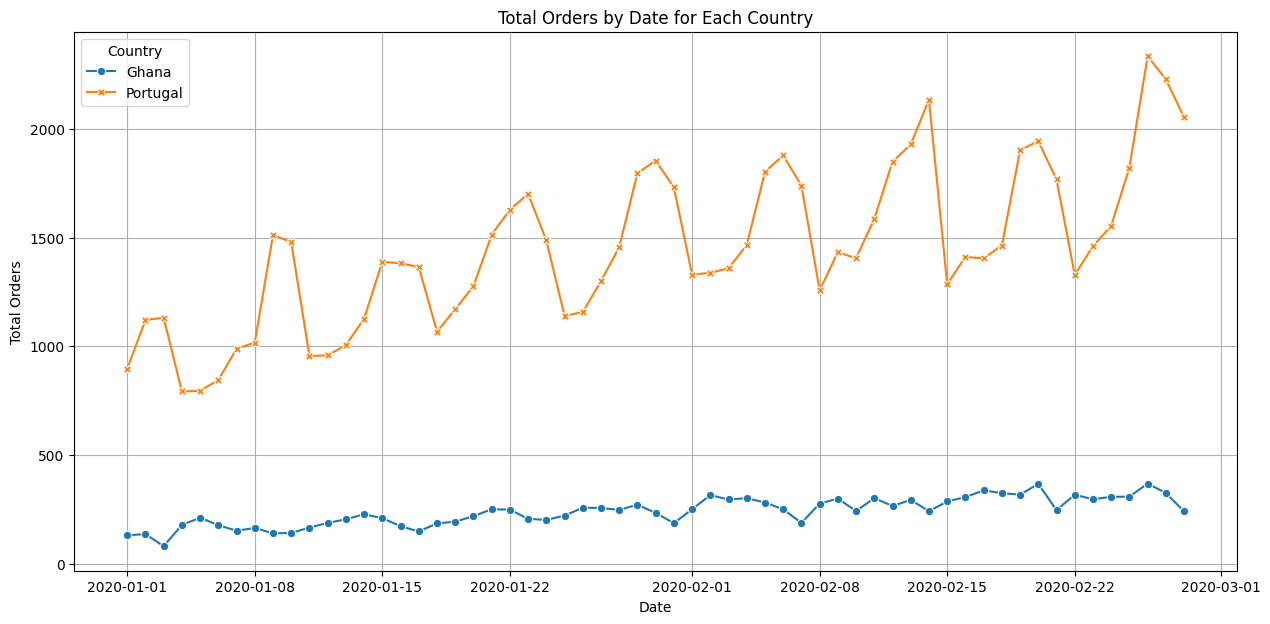

In [105]:
# Aggregate data by Country and Created Date for the total order count
datewise_order_data = data.groupby(['Country', 'Created Date']).size().reset_index(name='Total Orders')

# Creating a line plot for total orders by date for each country
plt.figure(figsize=(15, 7))
sns.lineplot(data=datewise_order_data, 
             x='Created Date', 
             y='Total Orders', 
             hue='Country', 
             style='Country', 
             markers=True, 
             dashes=False)

plt.title('Total Orders by Date for Each Country')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.legend(title='Country')
plt.grid(True)
plt.show()

## Insights

Trend is visible in Portugal, But not able to visualize Ghana trend properly. 

Creating a new plot for Ghana individually.


### Checking the busiest day of the week  

In [106]:
# creating a column with day of the week
data['day'] = data['Created Date'].dt.day_name()

# Aggregate data by Country and Created Date for the total order count
day_order_data = data.groupby(['Country', 'day']).size().reset_index(name='Total Orders')

# Sort the DataFrame by 'column_to_sort' in descending order
day_order_data = day_order_data.sort_values(by=['Total Orders'], ascending=True)

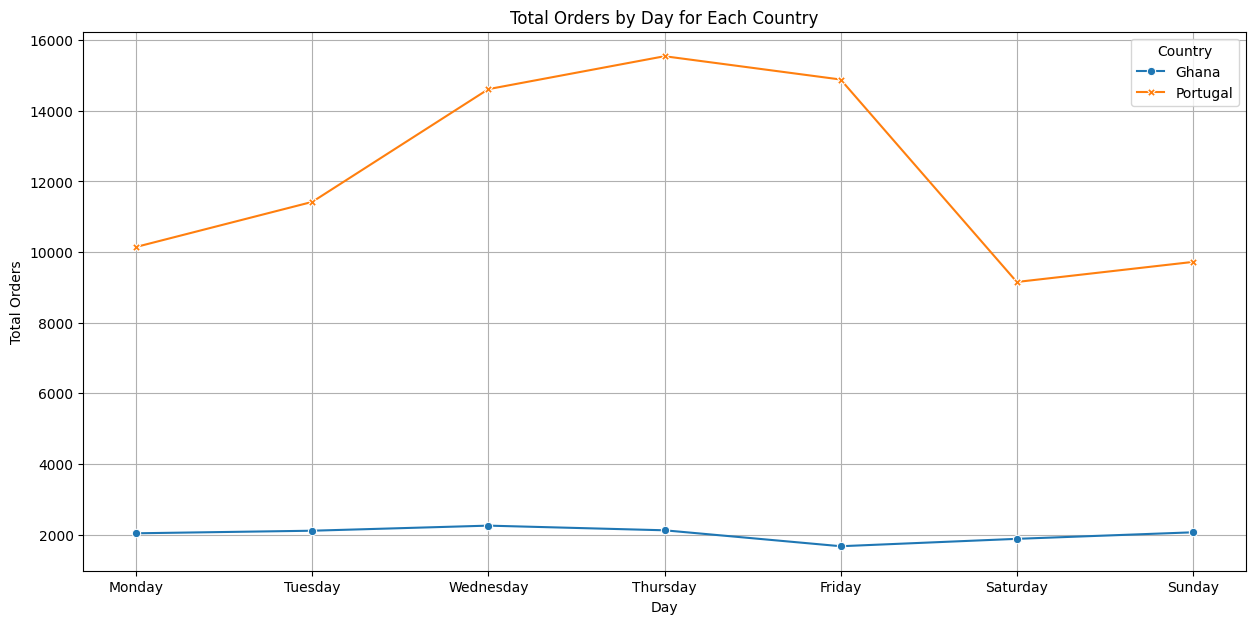

In [107]:
# Define the order of the days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'day' column to a categorical type with the specified order
day_order_data['day'] = pd.Categorical(day_order_data['day'], categories=days_order, ordered=True)

# Now Creating the Plot Below
plt.figure(figsize=(15, 7))
sns.lineplot(data=day_order_data, 
             x='day', 
             y='Total Orders', 
             hue='Country', 
             style='Country', 
             markers=True, 
             dashes=False)

plt.title('Total Orders by Day for Each Country')
plt.xlabel('Day')
plt.ylabel('Total Orders')
plt.legend(title='Country')
plt.grid(True)
plt.show()

## Insight

#### From the above graph we can deduce that the busiest days of the week are "Wednesday","Thursday","Friday" in Portugal.


## Checking trend for Ghana

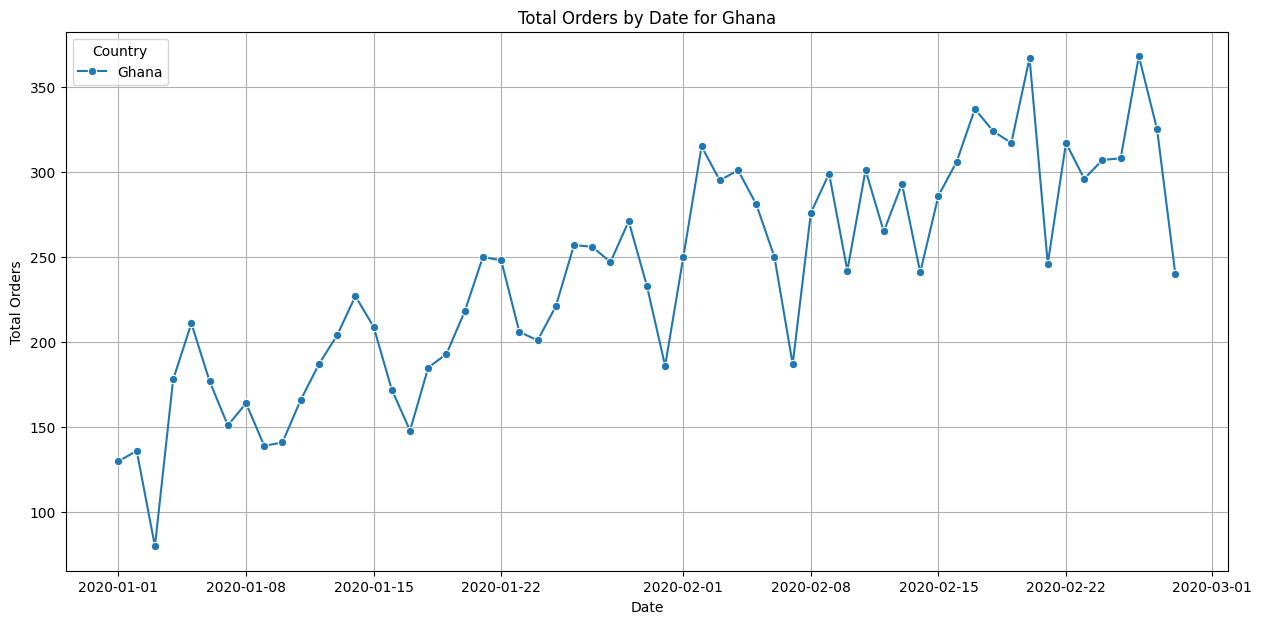

In [108]:
# Aggregate data by Country and Created Date for the total order count
datewise_order_data = data.groupby(['Country', 'Created Date']).size().reset_index(name='Total Orders')

# fitler dataframe for Ghana
datewise_order_data_ghana = datewise_order_data[datewise_order_data['Country'] == 'Ghana']

# Creating a line plot for total orders by date for each country
plt.figure(figsize=(15, 7))
sns.lineplot(data=datewise_order_data_ghana, x='Created Date', y='Total Orders', hue='Country', 
             style='Country', markers=True, dashes=False)

plt.title('Total Orders by Date for Ghana')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.legend(title='Country')
plt.grid(True)
plt.show()

### Checking the busiest day of the week  

/tmp/ipykernel_351589/26850105.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_order_data_ghana['day'] = pd.Categorical(day_order_data_ghana['day'], categories=days_order, ordered=True)


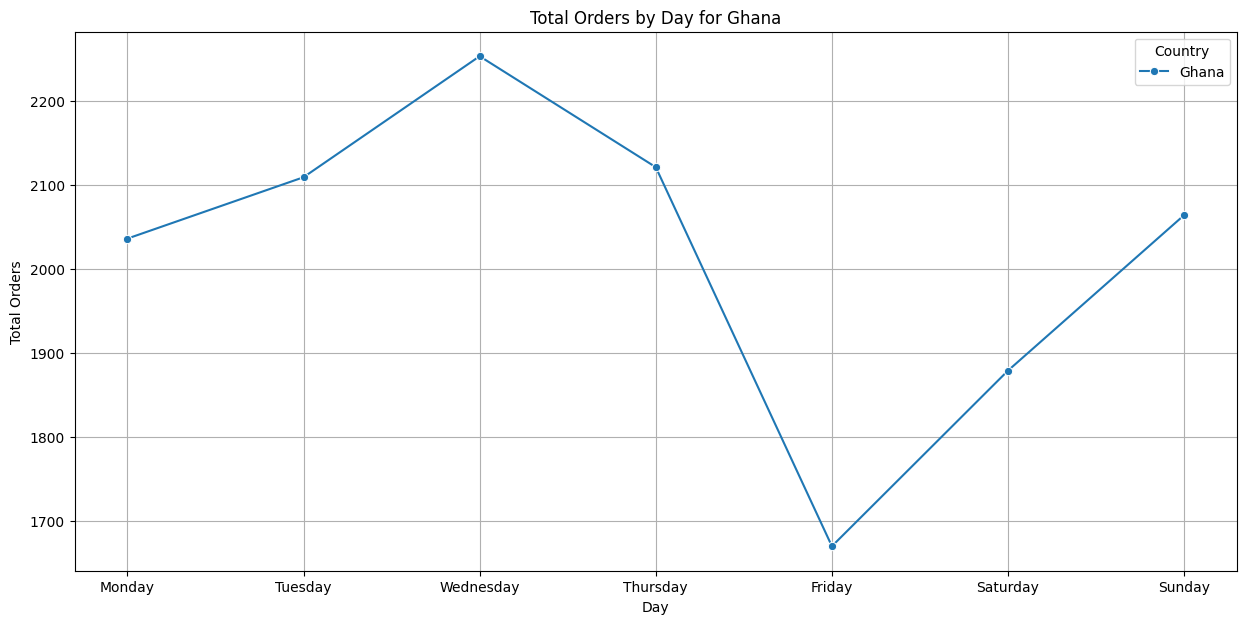

In [113]:
# Define the order of the days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


# Filtering the dataframe for Ghana
day_order_data_ghana = day_order_data[day_order_data['Country'] == 'Ghana']

# Convert 'day' column to a categorical type with the specified order
day_order_data_ghana['day'] = pd.Categorical(day_order_data_ghana['day'], categories=days_order, ordered=True)

# Now Creating the Plot Below
plt.figure(figsize=(15, 7))
sns.lineplot(data=day_order_data_ghana, 
             x='day', 
             y='Total Orders', 
             hue='Country', 
             style='Country', 
             markers=True, 
             dashes=False)

plt.title('Total Orders by Day for Ghana')
plt.xlabel('Day')
plt.ylabel('Total Orders')
plt.legend(title='Country')
plt.grid(True)
plt.show()

## Insights:

Ghana has usually busier on "Tuesday","Wednesday","Thursday"

# --------------------------- Ans 2 -----------------------------


# Time Series Forcasting 

In [119]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import io
import requests

In [120]:
url="https://raw.githubusercontent.com/Mavericky007/Streamlit/main/Bolt/data/data2.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [121]:
data["Created Date"] = pd.to_datetime(data["Created Date"], format='%d.%m.%Y')
data['Order Value(Gross)'] = data['Order Value € (Gross)'].str.replace('€', '').astype(float)
data['Cancel Reason'] = data['Cancel Reason'].fillna('none')

In [122]:
data.head()

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time,Order Value(Gross)
0,2020-02-28,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,none,Sushi,ios,cashless,BANKINTER S.A.,13,€89.30,0.0,17.7,89.30
1,2020-02-28,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,none,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,€10.00,0.0,16.3,10.00
2,2020-02-28,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,none,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,€16.96,0.0,13.6,16.96
3,2020-02-28,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,none,South American,ios,cashless,ING BANK N.V.,3,€25.15,4.2,26.1,25.15
4,2020-02-28,Portugal,Lisbon,9695,Choupana Caffe,delivered,none,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,€16.00,0.0,11.6,16.00


In [125]:
order_data = data.groupby(['Created Date']).size().reset_index(name='Total Orders')
order_data.head()

,Created Date,Total Orders
0,2020-01-01,1027
1,2020-01-02,1257
2,2020-01-03,1211
3,2020-01-04,970
4,2020-01-05,1006


In [127]:
## Cleaning up the data
order_data.columns=["date","orders"]
order_data.head()

,date,orders
0,2020-01-01,1027
1,2020-01-02,1257
2,2020-01-03,1211
3,2020-01-04,970
4,2020-01-05,1006


In [128]:
order_data.set_index('date',inplace=True)
order_data.head()

,orders
date,
2020-01-01,1027
2020-01-02,1257
2020-01-03,1211
2020-01-04,970
2020-01-05,1006


<Axes: xlabel='date'>

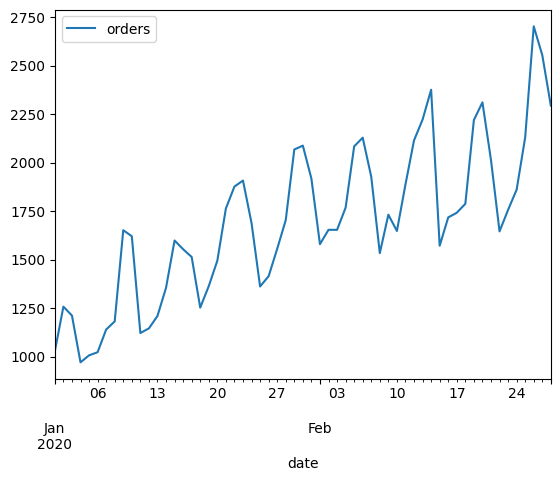

In [129]:
order_data.plot()

## Testing for Stationary

In [131]:
from statsmodels.tsa.stattools import adfuller

In [133]:
test_result=adfuller(order_data['orders'])

In [136]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(orders):
    result=adfuller(orders)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")


In [137]:
adfuller_test(order_data['orders'])

ADF Test Statistic : -1.5475383144763235
p-value : 0.5098776053757463
#Lags Used : 7
Number of Observations Used : 51
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


## Differencing

In [139]:
order_data['Order First Difference'] = order_data['orders'] - order_data['orders'].shift(1)

In [259]:
order_data['Seasonal First Difference']=order_data['orders']-order_data['orders'].shift(7)

In [260]:
## Again test dickey fuller test
adfuller_test(order_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.633783431207566
p-value : 0.005147053756572822
#Lags Used : 3
Number of Observations Used : 48
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

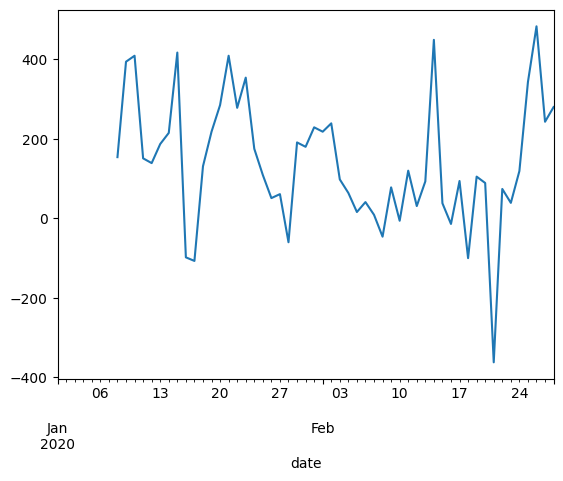

In [261]:
order_data['Seasonal First Difference'].plot()

## Auto Regressive Model

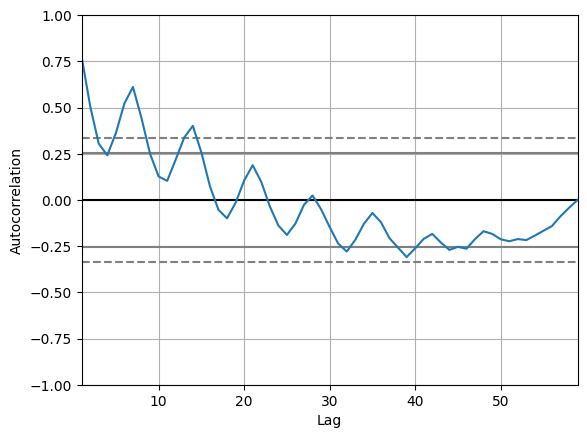

In [262]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(order_data['orders'])
plt.show()

In [263]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

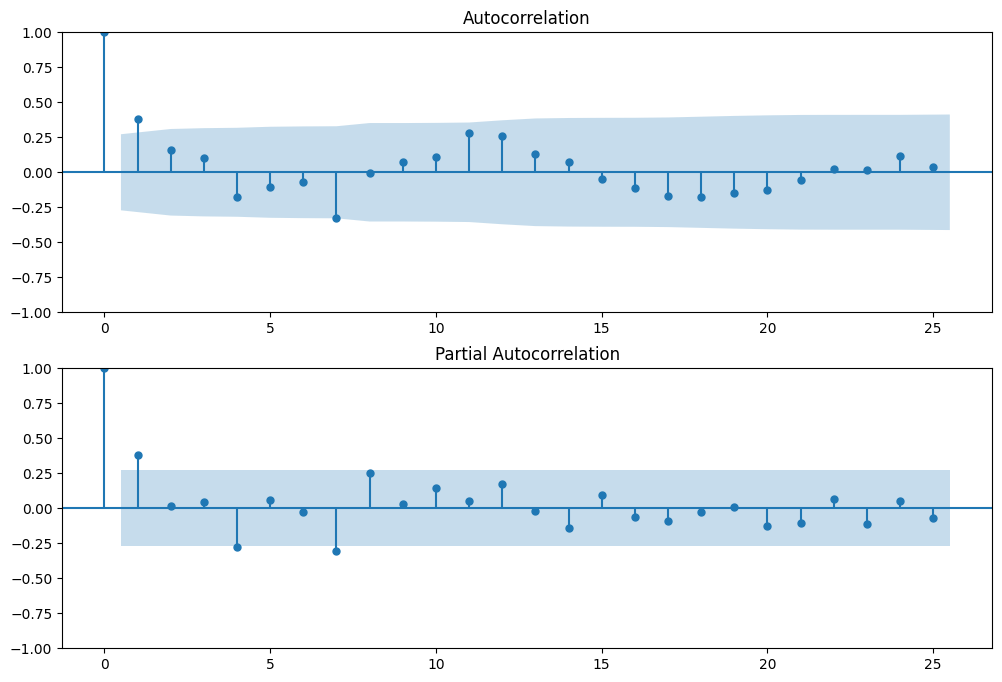

In [264]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(order_data['Seasonal First Difference'].iloc[7:],lags=25,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(order_data['Seasonal First Difference'].iloc[7:],lags=25,ax=ax2)

In [265]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [266]:
model=ARIMA(order_data['orders'],order=(2,1,0))
model_fit=model.fit()

/dsw/snapshots/de58d158-6501-49dd-b30a-8ebfbbd41e7a/python310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/dsw/snapshots/de58d158-6501-49dd-b30a-8ebfbbd41e7a/python310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/dsw/snapshots/de58d158-6501-49dd-b30a-8ebfbbd41e7a/python310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [267]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 orders   No. Observations:                   59
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -399.212
Date:                Sun, 14 Jan 2024   AIC                            804.423
Time:                        04:58:47   BIC                            810.605
Sample:                    01-01-2020   HQIC                           806.831
                         - 02-28-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1433      0.144      0.993      0.321      -0.139       0.426
ar.L2         -0.2293      0.169     -1.356      0.175      -0.561       0.102
sigma2      5.669e+04   8611.259      6.583      0.000    3.98e+04    7.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 7.47
Prob(Q):                              0.52   Prob(JB):                         0.02
Heteroskedasticity (H):               2.54   Skew:                            -0.53
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

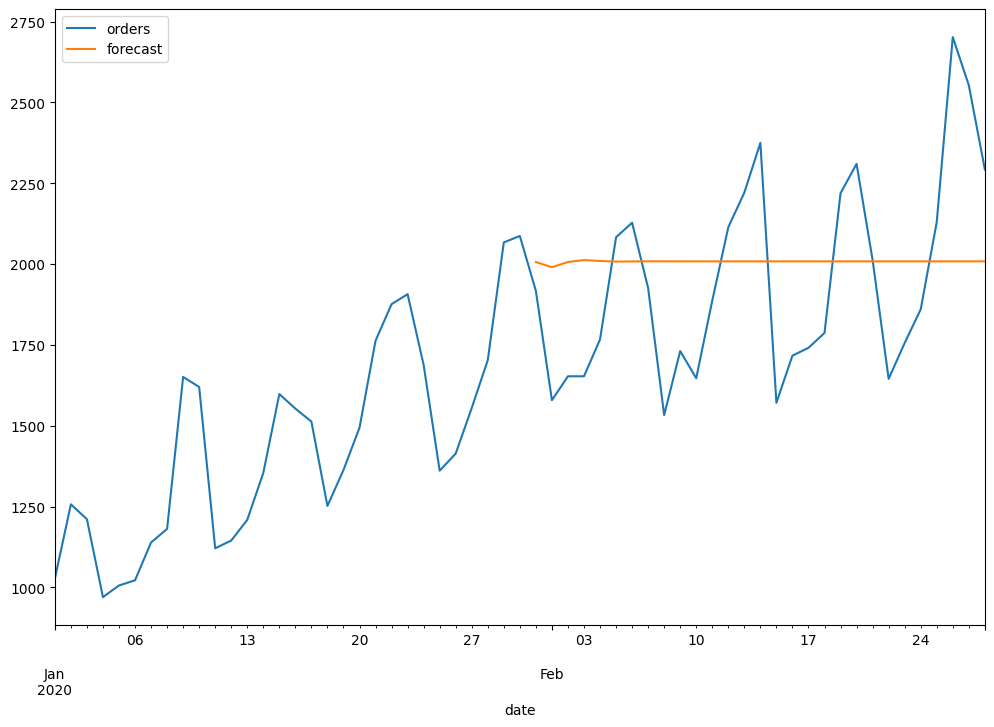

In [276]:
order_data['forecast']=model_fit.predict(start=30,end=60,dynamic=True)
order_data[['orders','forecast']].plot(figsize=(12,8))

In [305]:
model=sm.tsa.statespace.SARIMAX(order_data['orders'],order=(2, 1, 2),seasonal_order=(2,1,2,7))
results=model.fit()

/dsw/snapshots/de58d158-6501-49dd-b30a-8ebfbbd41e7a/python310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/dsw/snapshots/de58d158-6501-49dd-b30a-8ebfbbd41e7a/python310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/dsw/snapshots/de58d158-6501-49dd-b30a-8ebfbbd41e7a/python310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/dsw/snapshots/de58d158-6501-49dd-b30a-8ebfbbd41e7a/python310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zero

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62846D+00    |proj g|=  3.50428D-01

At iterate    5    f=  5.51137D+00    |proj g|=  6.92147D-02

At iterate   10    f=  5.49369D+00    |proj g|=  3.06313D-03

At iterate   15    f=  5.49290D+00    |proj g|=  2.49541D-03

At iterate   20    f=  5.49203D+00    |proj g|=  1.95604D-02

At iterate   25    f=  5.47730D+00    |proj g|=  2.54674D-02

At iterate   30    f=  5.47471D+00    |proj g|=  1.76538D-03

At iterate   35    f=  5.47464D+00    |proj g|=  2.79248D-03

At iterate   40    f=  5.47396D+00    |proj g|=  6.76328D-03

At iterate   45    f=  5.47379D+00    |proj g|=  1.84412D-03

At iterate   50    f=  5.47367D+00    |proj g|=  6.43588D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/dsw/snapshots/de58d158-6501-49dd-b30a-8ebfbbd41e7a/python310/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

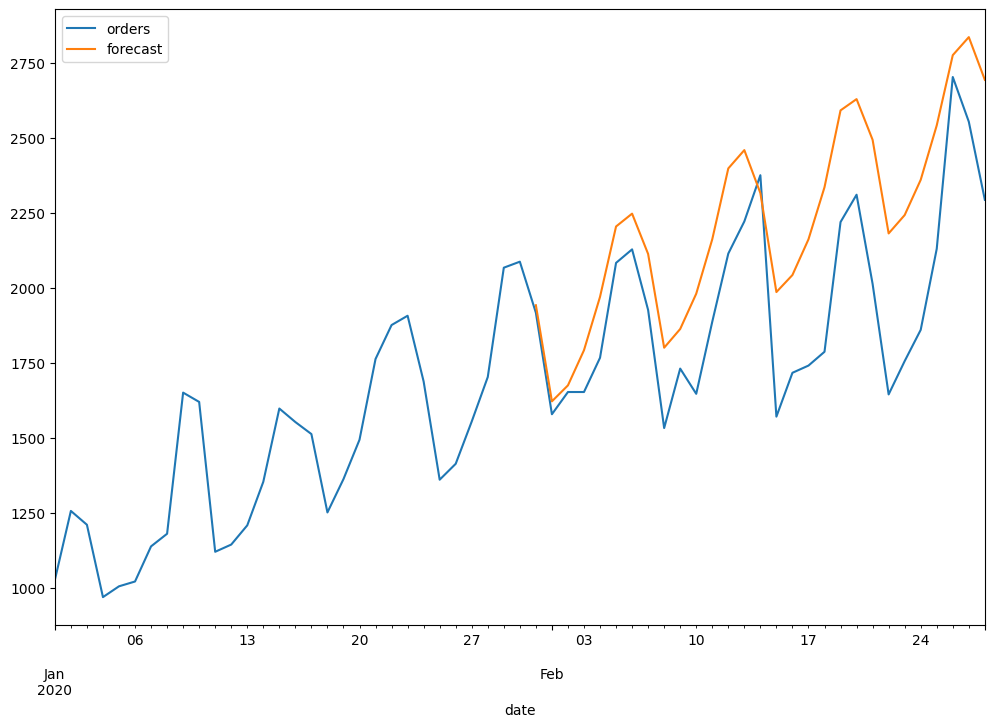

In [306]:
order_data['forecast']=results.predict(start=30,end=60,dynamic=True)
order_data[['orders','forecast']].plot(figsize=(12,8))

In [307]:
from pandas.tseries.offsets import DateOffset
future_dates=[order_data.index[-1]+ DateOffset(days=x)for x in range(0,33)]

In [308]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [309]:
future_df=pd.concat([order_data,future_datest_df])

<Axes: >

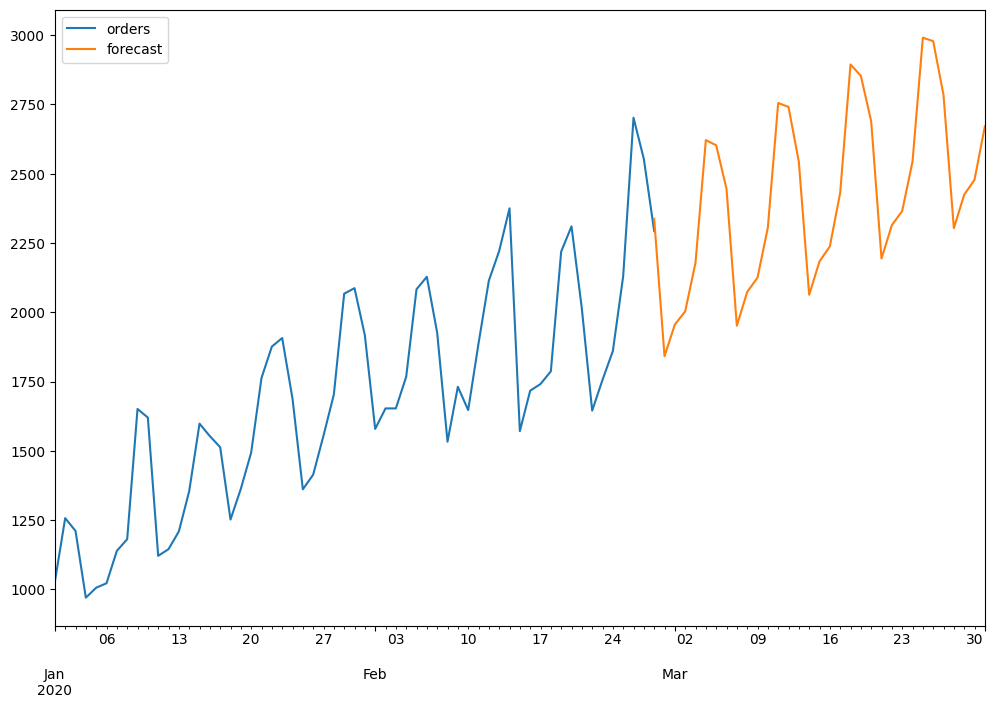

In [317]:
future_df['forecast'] = results.predict(start = 58, end = 90, dynamic= True)  
future_df[['orders', 'forecast']].plot(figsize=(12, 8)) 

In [318]:
predicted_data = future_df[['orders', 'forecast']]
predicted_data.tail()

,orders,forecast
2020-03-27,NaN,2783.853690
2020-03-28,NaN,2303.415816
2020-03-29,NaN,2423.998825
2020-03-30,NaN,2478.067997
2020-03-31,NaN,2670.830410


In [343]:
value = predicted_data['forecast'].loc['2020-03-01':'2020-03-31'].sum()

In [395]:
from IPython.display import Markdown, display

display(Markdown("## The Expected total number of orders in March are : **{:,.2f}**!".format(value)))

## The Expected total number of orders in March are : **75,698.29**!